# Рынок заведений общественного питания Москвы

Проведем исследование рынка заведений общественного питания Москвы.

# Описание данных
**Таблица rest_data:**

id — *идентификатор объекта;*

object_name — *название объекта общественного питания;*

chain — *сетевой ресторан;*

object_type — *тип объекта общественного питания;*

address — *адрес;*

number — *количество посадочных мест.*

## Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import re
import requests
from io import BytesIO

In [168]:
rest_data=pd.read_csv('/datasets/rest_data.csv')

In [169]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [170]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [171]:
#приведем названия заведений к нижнему регистру
rest_data['object_name']=rest_data['object_name'].str.lower()
rest_data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [172]:
#удалим дубликаты без столбца id
rest_data = rest_data.drop_duplicates(['object_name','chain','object_type', 'address','number'], keep='last')

In [173]:
rest_data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


## Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [174]:
rest_data2=rest_data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id',ascending=False)
rest_data2

,id
object_type,
кафе,6071
столовая,2584
ресторан,2282
предприятие быстрого обслуживания,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
магазин (отдел кулинарии),273


Text(0.5, 1.0, 'Распределение объектов общественного питания')

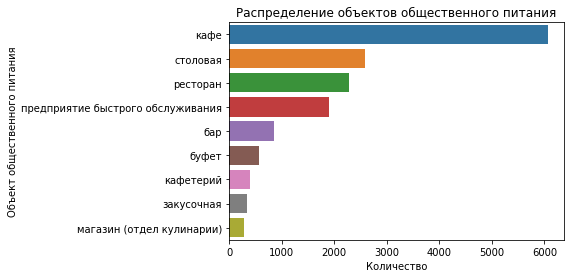

In [175]:
fig=sns.barplot(y="object_type", x="id", data=rest_data2.reset_index())
fig.set_xlabel('Количество')
fig.set_ylabel('Объект общественного питания')
fig.set_title('Распределение объектов общественного питания')

***Из графика видно, что в Москве большую часть рынка заведений общественного питания занимают кафе - их больше 6000. Примерно одинаковое количество столовых, ресторанов и предприятий быстрого обслуживания - 2587, 2285 и 1923 соответственно. Меньше всего отделов кулинарий - 273.***

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [176]:
rest_data3=rest_data.pivot_table(index='chain', values='id', aggfunc='count').sort_values(by='id',ascending=False)
rest_data3

,id
chain,
нет,12317
да,2964


Text(0.5, 1.0, 'Соотношение сетевых и несетевых объектов общественного питания')

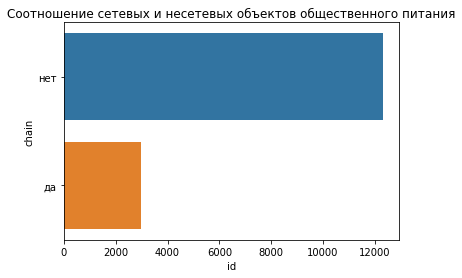

In [177]:
fig=sns.barplot(y="chain", x="id", data=rest_data3.reset_index())
fig.set_title('Соотношение сетевых и несетевых объектов общественного питания')

***По количеству заведений явным лидером являются несетевые объекты общественного питания, их больше в 4 раза (12398 заведений против 2968).***

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [178]:
#выбираем только сетевые заведения
rest_data_set=rest_data.query('chain=="да"')
rest_data_set

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [179]:
rest_data_set2=rest_data_set['object_type'].value_counts()
rest_data_set2

кафе                                 1396
предприятие быстрого обслуживания     788
ресторан                              543
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: object_type, dtype: int64

In [180]:
set=['1396','3','543','788','37','11','52','56','78']
rest_data2['set']=set
rest_data2

,id,set
object_type,,
кафе,6071,1396
столовая,2584,3
ресторан,2282,543
предприятие быстрого обслуживания,1897,788
бар,855,37
буфет,576,11
кафетерий,395,52
закусочная,348,56
магазин (отдел кулинарии),273,78


In [181]:
# переведем значения столбца set в int
rest_data2['set']=rest_data2['set'].astype(str).astype(int)
# найдем соотношение сетевых заведений к общему кол-ву
rest_data2['ratio']=rest_data2['set']/rest_data2['id']
rest_data2

,id,set,ratio
object_type,,,
кафе,6071,1396,0.229946
столовая,2584,3,0.001161
ресторан,2282,543,0.237949
предприятие быстрого обслуживания,1897,788,0.415393
бар,855,37,0.043275
буфет,576,11,0.019097
кафетерий,395,52,0.131646
закусочная,348,56,0.160920
магазин (отдел кулинарии),273,78,0.285714


In [182]:
rest_data2=rest_data2.sort_values(by='ratio', ascending=False)

Text(0.5, 1.0, 'Распределение сетевых объектов общественного питания')

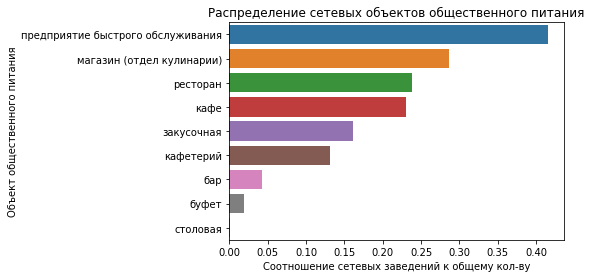

In [183]:

fig=sns.barplot(y="object_type", x="ratio", data=rest_data2.reset_index())
fig.set_xlabel('Соотношение сетевых заведений к общему кол-ву')
fig.set_ylabel('Объект общественного питания')
fig.set_title('Распределение сетевых объектов общественного питания')

***Как видно из графика, сетевое распространение характерно в основном для предприятий быстрого обслуживания. Затем идут магазины, рестораны и кафе. А вот сетевые столовые, бары и буфеты мало рапространены.***

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

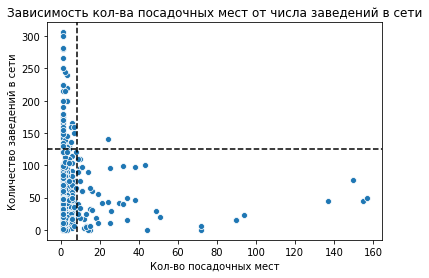

In [78]:
rest_data_numb=rest_data_set.groupby('object_name').agg({'number':'median','id':'count'})
fig=sns.scatterplot(data=rest_data_numb, x="id", y="number")
fig.set_xlabel('Кол-во посадочных мест')
fig.set_ylabel('Количество заведений в сети')
fig.set_title('Зависимость кол-ва посадочных мест от числа заведений в сети')
plt.axhline(np.percentile(rest_data_numb['number'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(rest_data_numb['id'], 90), linestyle='--', color='black')

***Из графика видно, что для сетевых заведений характерны сети с небольшим числом заведений и небольшим количеством посадочных мест. Меньше всего шансов встретить сети с большим кол-вом заведений и большим кол-вом посадочных мест***

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [184]:
rest_data_stol=rest_data.query(' object_type=="столовая"')

Text(0.5, 1, 'Рспределение числа посадочных мест в столовых')

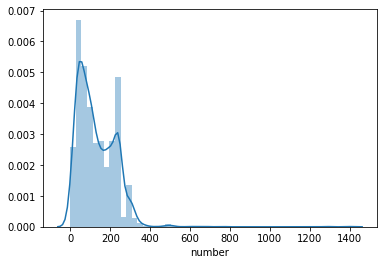

In [185]:
sns.distplot(rest_data_stol['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в столовых')

In [186]:
rest_data_stol['number'].describe()

count    2584.000000
mean      130.337848
std        95.189104
min         0.000000
25%        51.500000
50%       103.000000
75%       200.000000
max      1400.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в ресторанах')

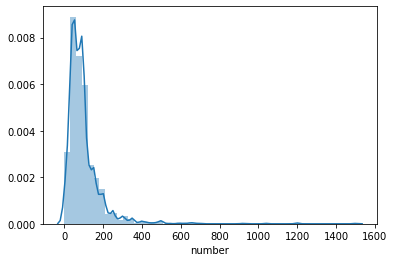

In [187]:
rest_data_rest=rest_data.query(' object_type=="ресторан"')
sns.distplot(rest_data_rest['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в ресторанах')

In [188]:
rest_data_rest['number'].describe()

count    2282.000000
mean       96.884750
std        94.781446
min         0.000000
25%        46.000000
50%        80.000000
75%       114.000000
max      1500.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в кафе')

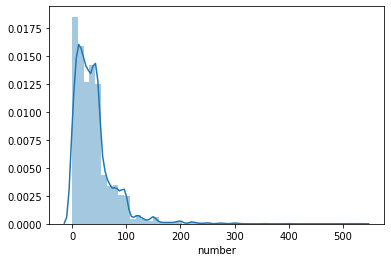

In [189]:
rest_data_cafe=rest_data.query(' object_type=="кафе"')
sns.distplot(rest_data_cafe['number'])
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в кафе')

In [190]:
rest_data_cafe['number'].describe()

count    6071.000000
mean       39.785703
std        37.751163
min         0.000000
25%        15.000000
50%        30.000000
75%        50.000000
max       533.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в буфетах')

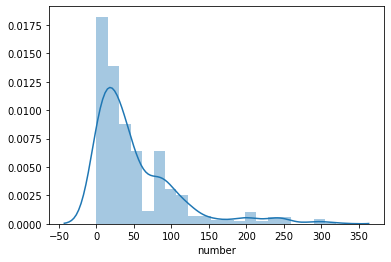

In [191]:
rest_data_bufet=rest_data.query(' object_type=="буфет"')
sns.distplot(rest_data_bufet['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в буфетах')

In [192]:
rest_data_bufet['number'].describe()

count    576.000000
mean      51.425347
std       56.512850
min        0.000000
25%       15.000000
50%       32.000000
75%       80.000000
max      320.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в барах')

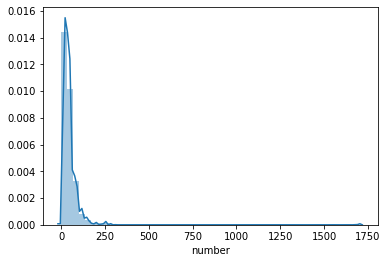

In [193]:
rest_data_bar=rest_data.query(' object_type=="бар"')
sns.distplot(rest_data_bar['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в барах')

In [194]:
rest_data_bar['number'].describe()

count     855.000000
mean       43.533333
std        67.112342
min         0.000000
25%        20.000000
50%        35.000000
75%        50.000000
max      1700.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в предпр. быстрого обслуживания')

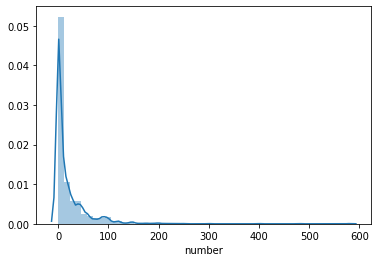

In [195]:
rest_data_fast=rest_data.query(' object_type=="предприятие быстрого обслуживания"')
sns.distplot(rest_data_fast['number'])
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в предпр. быстрого обслуживания')

In [196]:
rest_data_fast['number'].describe()

count    1897.000000
mean       20.808645
std        38.563004
min         0.000000
25%         0.000000
50%         6.000000
75%        25.000000
max       580.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в кафетериях')

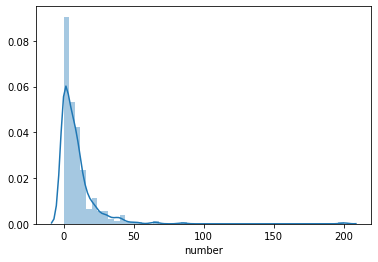

In [197]:
rest_data_cafet=rest_data.query(' object_type=="кафетерий"')
sns.distplot(rest_data_cafet['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в кафетериях')

In [198]:
rest_data_cafet['number'].describe()

count    395.000000
mean       9.184810
std       14.677023
min        0.000000
25%        0.000000
50%        6.000000
75%       12.000000
max      200.000000
Name: number, dtype: float64

Text(0.5, 1, 'Рспределение числа посадочных мест в закусочных')

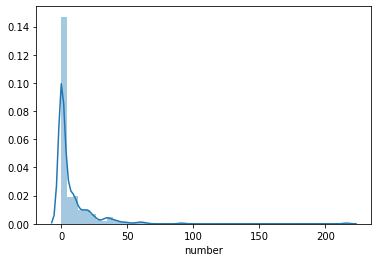

In [199]:
rest_data_zac=rest_data.query(' object_type=="закусочная"')
sns.distplot(rest_data_zac['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в закусочных')

In [200]:
rest_data_zac['number'].describe()

count    348.000000
mean       7.847701
std       16.884497
min        0.000000
25%        0.000000
50%        0.000000
75%       10.000000
max      216.000000
Name: number, dtype: float64

Text(0.5, 1.0, 'Рспределение числа посадочных мест в магазинах')

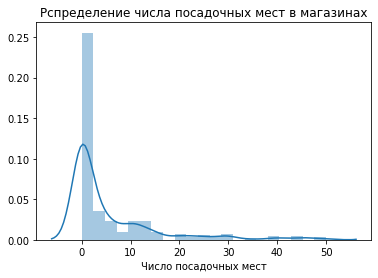

In [201]:
rest_data_mag=rest_data.query(' object_type=="магазин (отдел кулинарии)"')
fig=sns.distplot(rest_data_mag['number']) 
fig.set_xlabel('Число посадочных мест')
fig.set_title('Рспределение числа посадочных мест в магазинах')

In [202]:
rest_data_mag['number'].describe()

count    273.000000
mean       5.589744
std        9.872729
min        0.000000
25%        0.000000
50%        0.000000
75%        8.000000
max       50.000000
Name: number, dtype: float64

In [203]:
rest_data_mean_number=rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').sort_values(by='number', ascending=False)
rest_data_mean_number

,number
object_type,
столовая,130.337848
ресторан,96.884750
буфет,51.425347
бар,43.533333
кафе,39.785703
предприятие быстрого обслуживания,20.808645
кафетерий,9.184810
закусочная,7.847701
магазин (отдел кулинарии),5.589744


Text(0.5, 1.0, 'Среднее кол-во посадочных мест в объектах общественного питания')

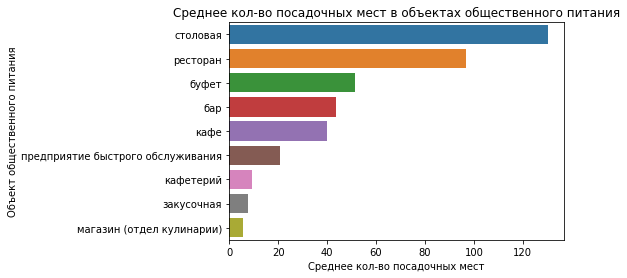

In [204]:
fig=sns.barplot( x="number",y="object_type", data=rest_data_mean_number.reset_index())
fig.set_xlabel('Cреднее кол-во посадочных мест')
fig.set_ylabel('Объект общественного питания')
fig.set_title('Среднее кол-во посадочных мест в объектах общественного питания')

***Самое большее среднее количество посадочных мест в столовых и ресторанах (130 и 96 мест соотвественно). Меньше всего посадочных мест в кафетериях, закусочных и отделах кулинарии (9, 7 и 5 мест).***

### Выделите в отдельный столбец информацию об улице из столбца address

In [205]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд','аллея'
         ,'бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)+".format("|".join(words))

rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,grill-house,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117,ЮВАО,Нижегородский район
5,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133,ЮЗАО,Район Южное Бутово
6,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,18,ЦАО,Таганский район
7,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,117,ЮВАО,Нижегородский район
8,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,133,ЮЗАО,Район Южное Бутово
9,24739,бар варвар,нет,кафе,"город Москва, улица Талалихина, дом 35",45,улица Талалихина,18,ЦАО,Таганский район


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [222]:
rest_data_top10=rest_data.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False)
rest_data_top10=rest_data_top10.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

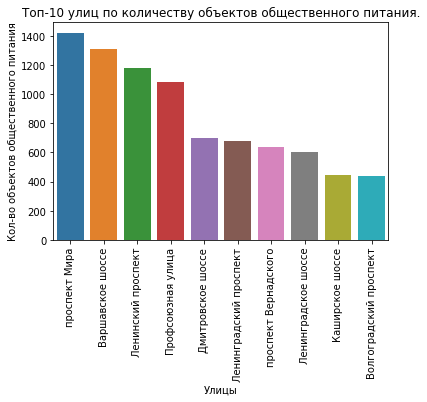

In [223]:
fig=sns.barplot( x="street",y="id", data=rest_data_top10.reset_index())
fig.set_xlabel('Улицы')
fig.set_ylabel('Кол-во объектов общественного питания')
fig.set_title('Топ-10 улиц по количеству объектов общественного питания.')
plt.xticks(rotation=90)

In [224]:
#ссылка на сайт 
orig_url_msc_dict= 'https://drive.google.com/file/d/1eTfYalCyfOIg6SWOrgV3_fzjkMkpZnWe/view?usp=sharing'
url_dict = requests.get('https://drive.google.com/uc?export=download&id=' + orig_url_msc_dict.split('/')[-2]).content
# читаем
msc_streets = pd.read_csv(BytesIO(url_dict))

In [225]:
msc_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [226]:
msc_streets = msc_streets.rename(columns={'streetname': 'street'})

In [227]:
#объединим таблицы rest_data и msc_streets
rest_data=rest_data.merge(msc_streets)
rest_data.head(5)

,id,object_name,chain,object_type,address,number,street,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,grill-house,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,18,ЦАО,Таганский район


In [228]:
rest_data_top10_street=rest_data.query('street in ("проспект Мира", "Профсоюзная улица","Ленинградский проспект","Пресненская набережная", "Варшавское шоссе", "Ленинский проспект", "проспект Вернадского", "Кутузовский проспект","Каширское шоссе","Кировоградская улица")')

In [229]:
rest_data_top10_street.pivot_table(index=['street','area'], values='id', aggfunc='count')

id
street                 area                                
Варшавское шоссе       Донской район                    164
                       Нагорный район                   164
                       Район Нагатино-Садовники         164
                       Район Северное Бутово            164
                       Район Чертаново Северное         164
                       Район Чертаново Центральное      164
                       Район Чертаново Южное            164
                       Район Южное Бутово               164
Каширское шоссе        Район Москворечье-Сабурово       111
                       Район Нагатино-Садовники         111
                       Район Орехово-Борисово Северное  111
                       Район Орехово-Борисово Южное     111
Кировоградская улица   Район Чертаново Северное         108
                       Район Чертаново Центральное      108
                       Район Чертаново Южное            108
Кутузовский проспект   Район Дорогомилово               114
                       Район Фили-Давыдково             114
Ленинградский проспект Район Аэропорт                   170
                       Район Беговой                    170
                       Район Сокол                      170
                       Хорошевский район                170
Ленинский проспект     Донской район                    147
                       Ломоносовский район              147
                       Обручевский район                147
                       Район Гагаринский                147
                       Район Проспект Вернадского       147
                       Район Теплый Стан                147
                       Район Тропарево-Никулино         147
                       Район Якиманка                   147
Пресненская набережная Пресненский район                167
Профсоюзная улица      Академический район              181
                       Обручевский район                181
                       Район Коньково                   181
                       Район Теплый Стан                181
                       Район Черемушки                  181
                       Район Ясенево                    181
проспект Вернадского   Ломоносовский район              128
                       Район Гагаринский                128
                       Район Проспект Вернадского       128
                       Район Раменки                    128
                       Район Тропарево-Никулино         128
проспект Мира          Алексеевский район               203
                       Мещанский район                  203
                       Останкинский район               203
                       Район Марьина роща               203
                       Район Ростокино                  203
                       Район Свиблово                   203
                       Ярославский Район                203

In [230]:

d = {"km":np.array([22.5, 10.5, 4.3, 8.3, 5.6, 10, 0.55, 9.3, 8, 8.9]),
    "rest_count": np.array([164, 111, 108, 114, 170, 147, 167, 181, 128, 203])}
df = pd.DataFrame(d, index=['Варшавское шоссе', 'Каширское шоссе', 'Кировоградская улица', 
        'Кутузовский проспект', 'Ленинградский проспект', 'Ленинский проспект', 'Пресненская набережная', 'Профсоюзная улица','проспект Вернадского', 'проспект Мира'])

df['ratio']=df['rest_count']/df['km']
df.sort_values(by='ratio')

,km,rest_count,ratio
Варшавское шоссе,22.50,164,7.288889
Каширское шоссе,10.50,111,10.571429
Кутузовский проспект,8.30,114,13.734940
Ленинский проспект,10.00,147,14.700000
проспект Вернадского,8.00,128,16.000000
Профсоюзная улица,9.30,181,19.462366
проспект Мира,8.90,203,22.808989
Кировоградская улица,4.30,108,25.116279
Ленинградский проспект,5.60,170,30.357143
Пресненская набережная,0.55,167,303.636364


***Самые популярные улицы проходят в основном через несколько районов (кроме Пресненской набережной). Именно потому что эти улицы такие протяженные, они и являются лидерами по количеству заведений.
Наиболее плотной улицей по количеству заведений общественного питания является Пресненская набережная. Связано это, скорее всего, с нахождением там делового центра Москва-Сити.***

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [231]:
rest_data_1object=rest_data.pivot_table(index=['street','area'], values='id', aggfunc='count')
print('Количество улиц с одним объектом общественного питания :',len(rest_data_1object.query('id=="1"')))

Количество улиц с одним объектом общественного питания : 564


In [232]:
rest_data_1object.query('id=="1"')

id
street                  area                       
1-й Балтийский переулок Район Аэропорт            1
1-й Басманный переулок  Басманный район           1
                        Красносельский район      1
1-й Ботанический проезд Район Свиблово            1
1-й Вешняковский проезд Рязанский район           1
...                                              ..
улица Шеногина          Район Хорошево-Мневники   1
улица Шумилова          Район Кузьминки           1
улица Шумкина           Район Сокольники          1
улица Щорса             Район Солнцево            1
шоссе Фрезер            Нижегородский район       1

[564 rows x 1 columns]

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Text(0.5, 1.0, 'Распределение посадочных мест для топ-10 улиц')

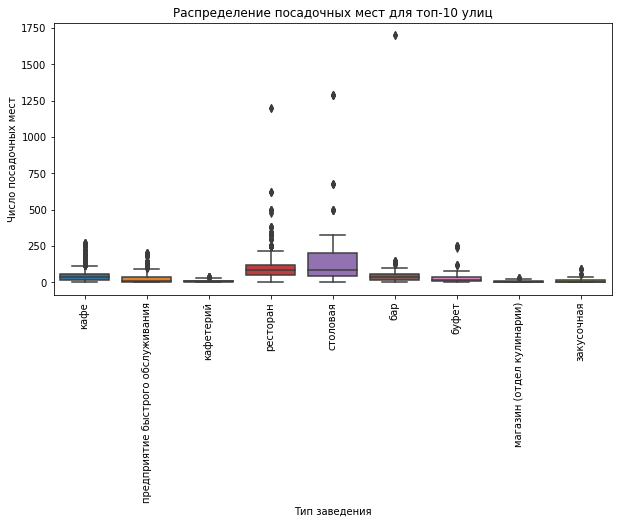

In [238]:
plt.figure(
    figsize=(10, 5))
fig=sns.boxplot(
    x='object_type', 
    y='number', 
    data=rest_data_top10_street
)
plt.xticks(rotation=90)
fig.set_xlabel('Тип заведения')
fig.set_ylabel('Число посадочных мест')
fig.set_title('Распределение посадочных мест для топ-10 улиц')

In [234]:
rest_data_top10_street['number'].describe()

count    7478.000000
mean       58.127842
std        80.586530
min         0.000000
25%        14.000000
50%        40.000000
75%        80.000000
max      1700.000000
Name: number, dtype: float64

***Из графиков видно, что для улиц с наибольшим количеством заведений общественного питания в основном характерно наличие небольшого количества посадочных мест, мало где их число достигает 100. Что подтверждается расчетами: в среднем по 57 посадочных мест. Медиана же еще меньше - всего по 40 мест.***

## Вывод

**В результате проведенного исследования можно сделать следующие выводы:**
-  в Москве большую часть рынка заведений общественного питания занимают кафе - их больше 6000.          Примерно одинаковое количество столовых, ресторанов и предприятий быстрого обслуживания - 2587,      2285 и 1923 соответсвенно. Меньше всего отделов кулинарий - 273.

- По количеству заведений явным лидером являются несетевые объекты общественного питания, их больше в   4 раза (12398 заведений против 2968).

- Сетевое распространение характерно в основном для предприятий быстрого обслуживания. Затем       идут магазины, рестораны и кафе. А вот сетевые столовые, бары и буфеты мало рапространены. 

- Для сетевых заведений характерно небольшое количество заведений в сети с небольшим количеством   посадочных мест. А вот встретить сети с большим количеством заведений и большим количеством     посадочных мест очень мало шансов.

- Самое большее среднее количество посадочных мест в столовых и ресторанах (130 и 96 мест               соотвественно). Меньше всего посадочных мест в кафетериях, закусочных и отделах кулинарии (9, 7 и 5   мест).
- Улицы с наибольшим количеством заведений: проспект Мира, Профсоюзная улица, Ленинградский             проспект,Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского,         Кутузовский проспект,Каширское шоссе,Кировоградская улица.

- Самые популярные улицы проходят в основном через несколько районов (кроме Пресненской           набережной).   Именно потому что эти улицы такие протяженные, они и являются лидерами по         количеству заведений. Именно Пресненская набережная является наиболее плотной по количеству     заведений на км.

- Для улиц с наибольшим количеством заведений общественного питания в основном характерно наличие       небольшого количества посадочных мест, мало где их число достигает 100. Что подтверждается           расчетами: в среднем по 57 посадочных мест. Медиана же еще меньше - всего по 40 мест.

**Для выбора местоположения нового кафе с официантами роботами можно рекомендовать центр города.Там хорошая проходимость и большое количество туристов в любое время года, которым будет интересно посетить такое заведение. Не стоит выбирать спальные районы. Если планируется в будущем сделать кафе сетевым, то количество посадочных мест должно быть около 15-20. Если нет, то количество посадочных мест можно сделать больше - около 30.**

## Презентация

 Презентация: <https://drive.google.com/file/d/1niYdJ6c9yL7S111nR4QnWZ1Lk-ib9HvL/view?usp=sharing>